In [5]:
from IPython.display import Image

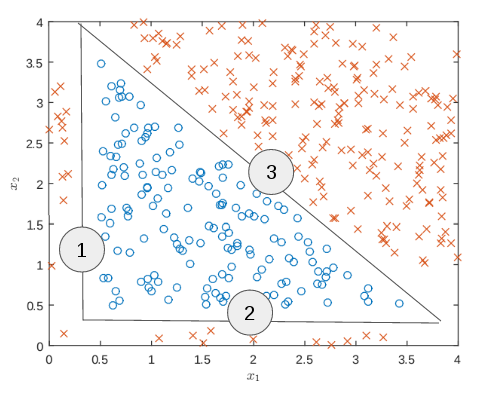

In [7]:
Image('./1-classification-triangle-lines.png', width=300)

# (a)

Let $z^{h_i}$ and $z^o$ be the input to the sigmoid function at the hidden and output layers.

\begin{align*}
\frac{\partial l}{\partial w_{1,2}^{[1]}} 
&= \frac{\partial l}{\partial o} \frac{\partial o}{\partial z^o} \frac{\partial z^o}{\partial h_2} \frac{\partial h_2}{\partial z^{h_2}} \frac{\partial z^{h_2}}{\partial w_{1,2}^{[1]}}
\\
&= \frac{1}{m} \sum_{i}^{m} 2o^{(i)} o^{(i)}(1 - o^{(i)}) w_2^{[2]} h_2(1 - h_2) x_1^{(i)}
\end{align*}

Here, we used the fact that for the sigmoid function

$$\sigma(z) = \frac{1}{1 + e^{(-z)}}$$

It's derivative w.s.t. $z$ is

$$\frac{\partial \sigma}{\partial z} = \sigma(z)(1 - \sigma(z))$$

# (b)

Based on the hinted triangle, we construct the following matrix multiplication as 

$$
\begin{bmatrix}
 -1 & 5 & 0 \\ 
 -1 & 0 & 5 \\ 
 4.2 & -1 & -1
\end{bmatrix} \begin{bmatrix}
1 \\
x_1 \\
x_2 \\
\end{bmatrix}
$$

When the data point is within the triangle, the $f(z$) will be $[1, 1, 1]^T$. Otherwise, it's one of the seven binary vectors. 

Then, let's construct the second matrix multiplication as 

$$
\begin{bmatrix}
 -1 & -1 & -1 & 2.5 \\ 
\end{bmatrix} \begin{bmatrix}
1 \\
1 \\
1 \\
1 \\
\end{bmatrix}
$$

The addition $1$ in the vector is the bias. Therefore, only when a data point is inside the triangle, will the product be $<0$, and hence categorized as class $0$. Otherwise, it will be classified as class $1$. Hence, the accuracy is 100%.

# (c)

No, it can't because the current classes cannot be linearly separately. If the activation is linear, then it's an affine transformation from 2D to 3D spaces, and the classification problem will still be non-linearly in the 3D space, which cannot be solved by a step function.

#### Demonstration of linear transformation from 1D to 2D space.

No bias is included, so it's linear instead of affine transformation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
a = np.array([[1, 2, 2.5, 3]])

In [3]:
b1 = np.array([[1, 1]])
b2 = np.array([[-1, 1]])
b3 = np.array([[1, -1]])
b4 = np.array([[-1, -1]])

c1 = np.array([[0.5, 1.5]])
c2 = np.array([[-0.5, 1.5]])
c3 = np.array([[0.5, -1.5]])
c4 = np.array([[-0.5, -1.5]])

d1 = np.array([[1, 0]])
d2 = np.array([[0, 1]])
d3 = np.array([[-1, 0]])
d4 = np.array([[0, -1]])

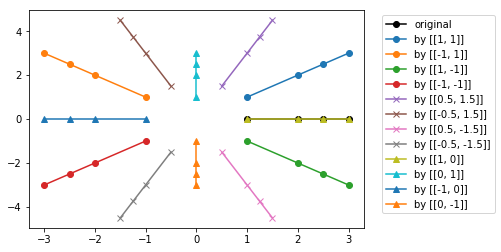

In [4]:
plt.plot(a[0], np.zeros_like(a)[0], 'o-', c='k', label='original')
for _ in [b1, b2, b3, b4]:
    plt.plot(*a.T.dot(_).T, 'o-', label='by {0}'.format(_.tolist()))
for _ in [c1, c2, c3, c4]:
    plt.plot(*a.T.dot(_).T, 'x-', label='by {0}'.format(_.tolist()))
for _ in [d1, d2, d3, d4]:
    plt.plot(*a.T.dot(_).T, '^-', label='by {0}'.format(_.tolist()))
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")